In [1]:
import pandas as pd

metadata = pd.read_csv('data/bird_songs_metadata.csv')

print(metadata.head())

       id       genus   species subspecies           name  \
0  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
1  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
2  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
3  557838  Thryomanes  bewickii        NaN  Bewick's Wren   
4  557838  Thryomanes  bewickii        NaN  Bewick's Wren   

                recordist        country  \
0  Whitney Neufeld-Kaiser  United States   
1  Whitney Neufeld-Kaiser  United States   
2  Whitney Neufeld-Kaiser  United States   
3  Whitney Neufeld-Kaiser  United States   
4  Whitney Neufeld-Kaiser  United States   

                                  location  latitude  longitude altitude  \
0  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
1  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
2  Arlington, Snohomish County, Washington   48.0708  -122.1006      100   
3  Arlington, Snohomish County, Washington   48.0708  -122.1006 

In [2]:
df = metadata.loc[:, ["name", "file"]]

print(df)

                   name      filename
0         Bewick's Wren  557838-0.wav
1         Bewick's Wren  557838-1.wav
2         Bewick's Wren  557838-4.wav
3         Bewick's Wren  557838-5.wav
4         Bewick's Wren  557838-6.wav
...                 ...           ...
5417  Northern Cardinal   11713-8.wav
5418  Northern Cardinal  11713-10.wav
5419  Northern Cardinal  11713-14.wav
5420  Northern Cardinal  11713-15.wav
5421  Northern Cardinal  11713-16.wav

[5422 rows x 2 columns]


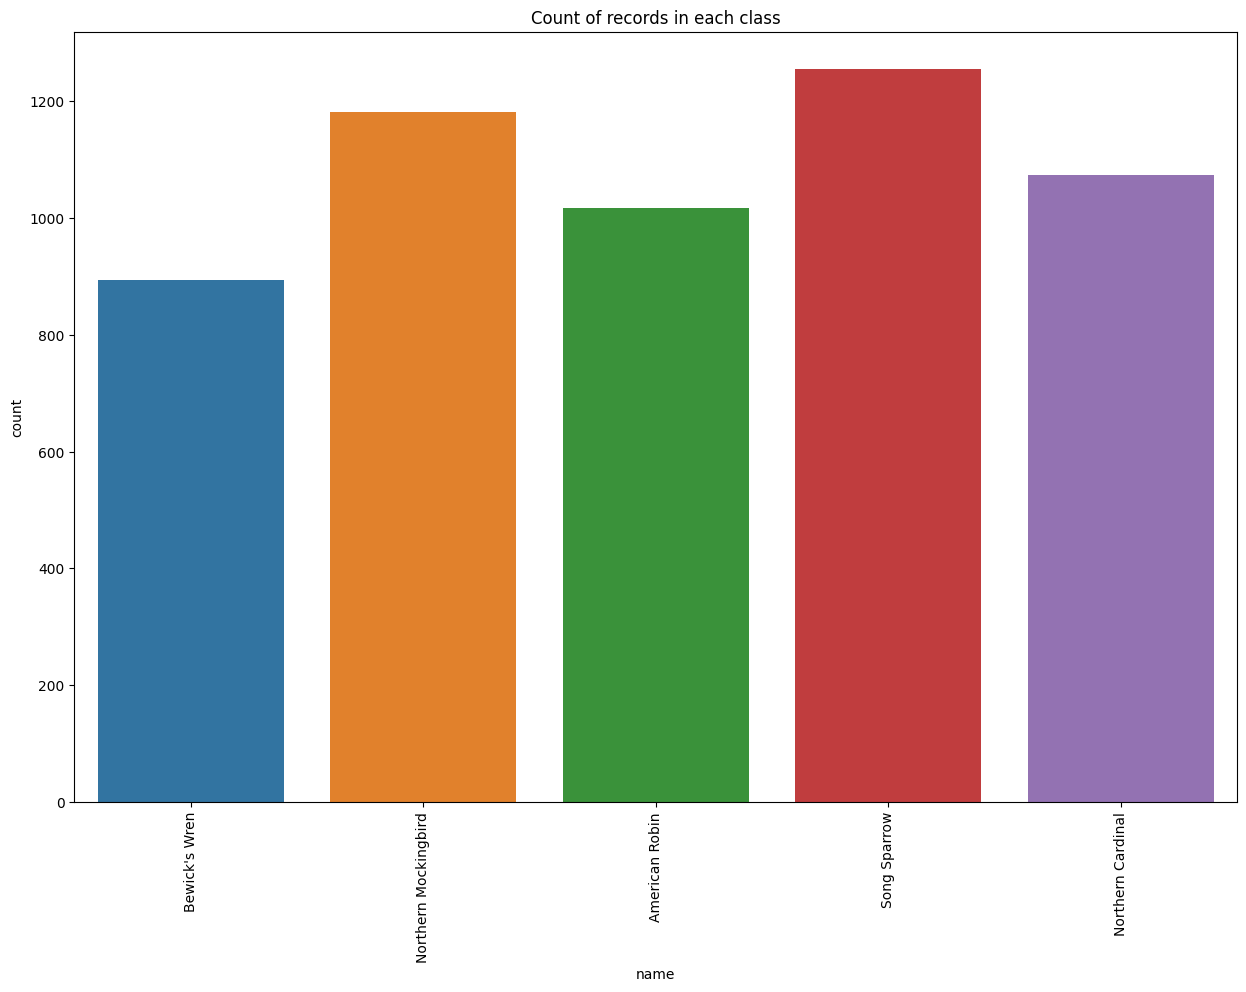

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.countplot(x="name", data=df)

plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt


def create_spectrogram_plt(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms_db = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms_db, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)


def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for i, file in enumerate(os.listdir(input_path)):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram_plt(input_file, output_file)


create_pngs_from_wavs('data/wavfiles/', 'data/png/')

In [5]:
bird_to_int = {bird: index for index, bird in enumerate(df['name'].unique())}
int_to_bird = {index: bird for bird, index in bird_to_int.items()}

df.loc[:, 'class'] = df['name'].map(bird_to_int)

print(df)

                   name      filename  class
0         Bewick's Wren  557838-0.wav      0
1         Bewick's Wren  557838-1.wav      0
2         Bewick's Wren  557838-4.wav      0
3         Bewick's Wren  557838-5.wav      0
4         Bewick's Wren  557838-6.wav      0
...                 ...           ...    ...
5417  Northern Cardinal   11713-8.wav      4
5418  Northern Cardinal  11713-10.wav      4
5419  Northern Cardinal  11713-14.wav      4
5420  Northern Cardinal  11713-15.wav      4
5421  Northern Cardinal  11713-16.wav      4

[5422 rows x 3 columns]


In [6]:
import keras
import os

x = []
y = []
z = []

for index, row in df.iterrows():
    path = os.path.join('out/png', row["file"].replace(".wav", ".png"))
    img = keras.utils.load_img(path, target_size=(32, 32, 3))
    arr = keras.utils.img_to_array(img)

    x.append(arr)
    y.append(row["class"])
    z.append(row["file"])

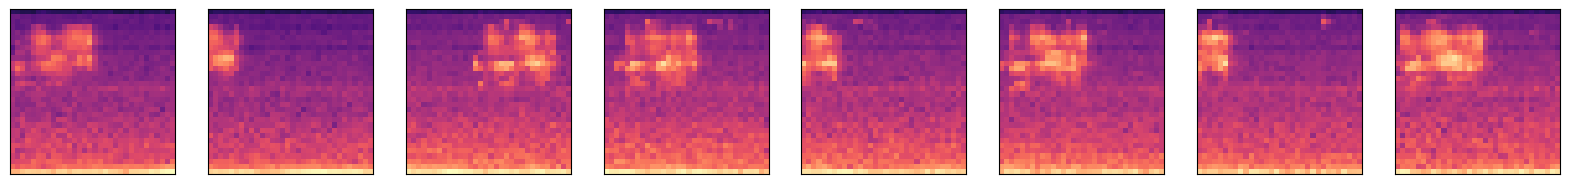

In [7]:
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)


show_images(x)

In [9]:
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

import numpy as np

x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, stratify=y,
                                                                     test_size=0.3, random_state=0)

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

[0, 1, 3, 0, 0, 2, 3, 1, 3, 4, 4, 3, 3, 4, 0, 1, 0, 4, 1, 3, 4, 2, 4, 1, 1, 4, 4, 1, 2, 4, 2, 0, 1, 0, 0, 2, 3, 1, 1, 4, 3, 3, 4, 4, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 2, 4, 4, 1, 0, 0, 4, 3, 3, 3, 3, 1, 4, 0, 4, 1, 2, 2, 1, 2, 3, 0, 1, 1, 3, 0, 4, 4, 4, 2, 0, 0, 2, 3, 1, 4, 1, 3, 0, 3, 1, 1, 0, 3, 2, 4, 0, 4, 4, 2, 4, 1, 2, 2, 0, 2, 1, 3, 3, 2, 3, 2, 1, 0, 2, 1, 2, 1, 4, 2, 0, 1, 4, 2, 0, 3, 3, 0, 3, 1, 1, 2, 2, 3, 1, 3, 4, 0, 4, 1, 0, 1, 3, 1, 1, 2, 1, 3, 0, 1, 4, 4, 0, 2, 0, 0, 0, 3, 0, 1, 4, 3, 4, 4, 4, 4, 1, 1, 1, 4, 3, 3, 3, 3, 2, 0, 0, 0, 1, 2, 4, 3, 0, 2, 2, 4, 2, 3, 2, 3, 3, 1, 3, 3, 1, 3, 0, 2, 3, 3, 0, 3, 2, 1, 4, 1, 1, 1, 3, 2, 3, 3, 0, 1, 1, 3, 1, 3, 2, 4, 1, 1, 3, 0, 3, 0, 1, 4, 1, 4, 2, 2, 3, 0, 4, 1, 0, 2, 3, 3, 0, 2, 2, 4, 3, 1, 0, 1, 1, 3, 0, 1, 2, 2, 4, 2, 3, 4, 0, 1, 3, 0, 3, 0, 0, 2, 4, 2, 1, 1, 2, 1, 2, 2, 1, 4, 0, 1, 4, 2, 3, 4, 0, 1, 3, 0, 3, 4, 3, 2, 4, 3, 0, 1, 3, 1, 1, 0, 4, 3, 3, 3, 2, 1, 3, 4, 2, 1, 1, 3, 3, 0, 4, 4, 3, 2, 3, 2, 2, 3, 4, 3, 1, 2, 3, 1, 2, 3, 2, 

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
import tensorflow as tf

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [11]:
hist = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10, epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/20
380/380 [==============================] - 7s 14ms/step - loss: 1.2138 - accuracy: 0.4427 - val_loss: 0.9705 - val_accuracy: 0.5704
Epoch 2/20
380/380 [==============================] - 7s 18ms/step - loss: 0.9003 - accuracy: 0.6153 - val_loss: 0.9037 - val_accuracy: 0.6165
Epoch 3/20
380/380 [==============================] - 5s 13ms/step - loss: 0.7608 - accuracy: 0.6917 - val_loss: 0.7596 - val_accuracy: 0.6994
Epoch 4/20
380/380 [==============================] - 5s 12ms/step - loss: 0.6569 - accuracy: 0.7449 - val_loss: 0.6958 - val_accuracy: 0.7412
Epoch 5/20
380/380 [==============================] - 7s 19ms/step - loss: 0.5622 - accuracy: 0.7863 - val_loss: 0.6294 - val_accuracy: 0.7695
Epoch 6/20
380/380 [==============================] - 5s 12ms/step - loss: 0.4769 - accuracy: 0.8282 - val_loss: 0.6468 - val_accuracy: 0.7757
Epoch 7/20
380/380 [==============================] - 5s 12ms/step - loss: 0.4076 - accuracy: 0.8567 - val_loss: 0.5645 - val_accuracy: 0.7959

[]

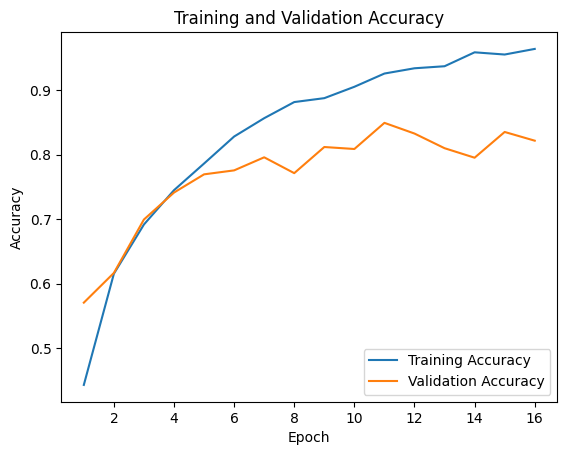

In [17]:
import matplotlib.pyplot as plt

accuracy = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.title('Training vs Validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.plot()

In [18]:
y_pred = model.predict(x_test)

51/51 [==============================] - 1s 14ms/step


In [19]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(20, 20))
mat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(mat)

[[207   4   4  44   9]
 [ 10 277  33   7  28]
 [ 11   7 267  11   9]
 [ 40   4   7 298  28]
 [  8  12   9   5 288]]


<Figure size 2000x2000 with 0 Axes>

In [20]:
from collections import Counter

birds = list(bird_to_int.keys())

counter_from_index = dict(Counter(y_test))
new = {int_to_bird[key]: value for key, value in counter_from_index.items()}
predicted = {name: mat[index][index] for index, name in enumerate(birds)}
print(predicted)

{"Bewick's Wren": 207, 'Northern Mockingbird': 277, 'American Robin': 267, 'Song Sparrow': 298, 'Northern Cardinal': 288}


In [21]:
for key, value in new.items():
    print(f'{key:30} {predicted[key]:2} / {value:2} | {(predicted[key] / value) * 100:.2f}%')

Bewick's Wren                  207 / 268 | 77.24%
Northern Mockingbird           277 / 355 | 78.03%
Song Sparrow                   298 / 377 | 79.05%
American Robin                 267 / 305 | 87.54%
Northern Cardinal              288 / 322 | 89.44%


In [27]:
import pandas as pd
import numpy as np
import holoviews as hv
import datashader as ds
import bokeh
import umap.umap_ as umapp
import umap.plot

reducer = umapp.UMAP(n_neighbors=len(birds), min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(y_pred)

umap.plot.output_notebook()

print(y_pred)

yT = y_pred.T
print(yT)

result = pd.DataFrame({int_to_bird[i]: yT[i] for i in range(5)})

birds = result.columns[:5]
result[birds] = result[birds].applymap(lambda x: f'{x * 100:.2f}%')

result['file'] = z_test
result['actual'] = [int_to_bird[x] for x in y_test]

result['predicted'] = [int_to_bird[np.argmax(row)] for row in y_pred]

p = umap.plot.interactive(reducer, labels=np.argmax(y_pred, axis=1), hover_data=result,
                          point_size=3)
umap.plot.show(p)

[[9.99975979e-01 8.72456985e-06 1.50605338e-05 6.19440543e-09
  2.48075906e-07]
 [5.89685340e-04 9.45610344e-01 5.26381694e-02 3.29682021e-04
  8.32027115e-04]
 [2.34191537e-01 4.02742968e-04 9.37769219e-05 7.62955308e-01
  2.35663005e-03]
 ...
 [6.75121692e-06 4.71945167e-01 5.28047919e-01 5.21090442e-08
  6.38396145e-08]
 [4.48201690e-03 1.61098451e-05 1.74410015e-05 9.95477736e-01
  6.71040925e-06]
 [2.19669063e-02 3.43996465e-01 1.15832455e-01 3.12114865e-01
  2.06089303e-01]]
[[9.99975979e-01 5.89685340e-04 2.34191537e-01 ... 6.75121692e-06
  4.48201690e-03 2.19669063e-02]
 [8.72456985e-06 9.45610344e-01 4.02742968e-04 ... 4.71945167e-01
  1.61098451e-05 3.43996465e-01]
 [1.50605338e-05 5.26381694e-02 9.37769219e-05 ... 5.28047919e-01
  1.74410015e-05 1.15832455e-01]
 [6.19440543e-09 3.29682021e-04 7.62955308e-01 ... 5.21090442e-08
  9.95477736e-01 3.12114865e-01]
 [2.48075906e-07 8.32027115e-04 2.35663005e-03 ... 6.38396145e-08
  6.71040925e-06 2.06089303e-01]]


In [28]:
import IPython

In [31]:
# predicted: Bewick's Wren
# actual: Nothern Cardinal
IPython.display.Audio('data/wavfiles/165345-11.wav')

In [32]:
# precited: Nothern Cardinal
# actual: Nothern Cardinal
IPython.display.Audio("data/wavfiles/211633-10.wav")

Звуки очень похожи. Эти точки лежали рядом на графике.